In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Get the image pairs

In [2]:
goi1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/goi1.jpg',cv2.IMREAD_GRAYSCALE)
goi2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/goi2.jpg',cv2.IMREAD_GRAYSCALE)

tajnew1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajnew1.jpg',cv2.IMREAD_GRAYSCALE)
tajnew2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajnew2.jpg',cv2.IMREAD_GRAYSCALE)

tajold1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajold1.jpg',cv2.IMREAD_GRAYSCALE)
tajold2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajold2.jpg',cv2.IMREAD_GRAYSCALE)

In [3]:
sift = cv2.SIFT_create()

kp_goi1 = sift.detect(goi1,None)
kp_goi2 = sift.detect(goi2,None)
kp_tajnew1 = sift.detect(tajnew1,None)
kp_tajnew2 = sift.detect(tajnew2,None)
kp_tajold1 = sift.detect(tajold1,None)
kp_tajold2 = sift.detect(tajold2,None)

In [4]:
goi1_kp =cv2.drawKeypoints(goi1,kp_goi1,goi1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
goi2_kp =cv2.drawKeypoints(goi2,kp_goi2,goi2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

tajnew1_kp =cv2.drawKeypoints(tajnew1,kp_tajnew1,tajnew1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
tajnew2_kp =cv2.drawKeypoints(tajnew2,kp_tajnew2,tajnew2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

tajold1_kp =cv2.drawKeypoints(tajold1,kp_tajold1,tajold1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
tajold2_kp =cv2.drawKeypoints(tajold2,kp_tajold2,tajold2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

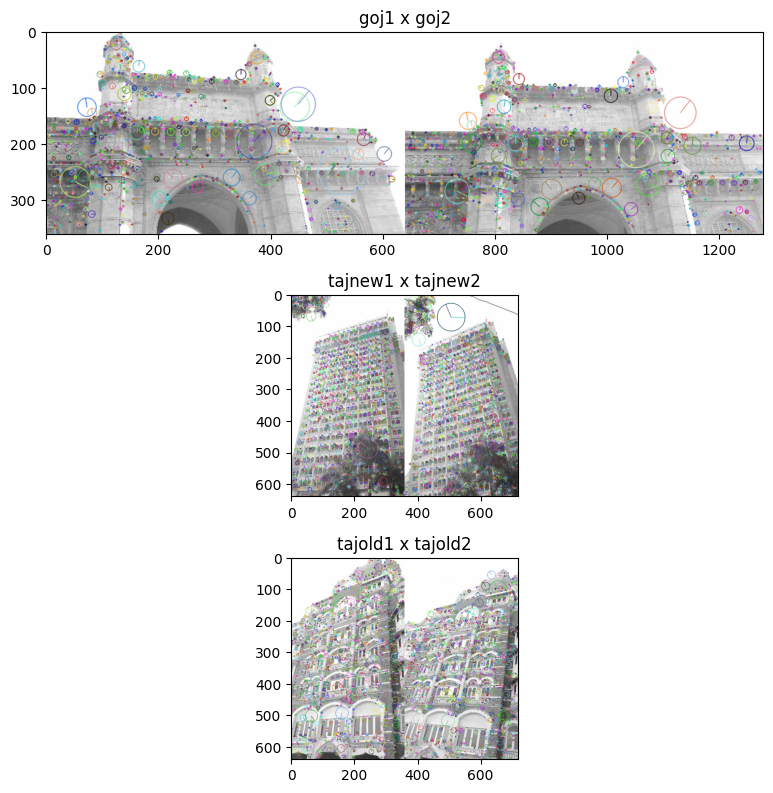

In [5]:
def stack_images(img1, img2):
    return np.hstack((img1, img2))

# Criar pares de imagens
pairs = [(goi1_kp, goi2_kp), (tajnew1_kp, tajnew2_kp), (tajold1_kp, tajold2_kp)]
pairs_label = ['goj1 x goj2', 'tajnew1 x tajnew2', 'tajold1 x tajold2']
idx = 0

# Criar uma figura para plotar os pares de imagens
plt.figure(figsize=(8, 8))

# Loop através dos pares de imagens e plotá-los
for i, (img1, img2) in enumerate(pairs, start=1):
    pair = stack_images(img1, img2)
    plt.subplot(len(pairs), 1, i)
    plt.imshow(cv2.cvtColor(pair, cv2.COLOR_BGR2RGB))
    plt.title(pairs_label[idx])
    idx +=1

# Ajustar o espaço entre os subplots
plt.tight_layout()

# Mostrar o gráfico
plt.show()

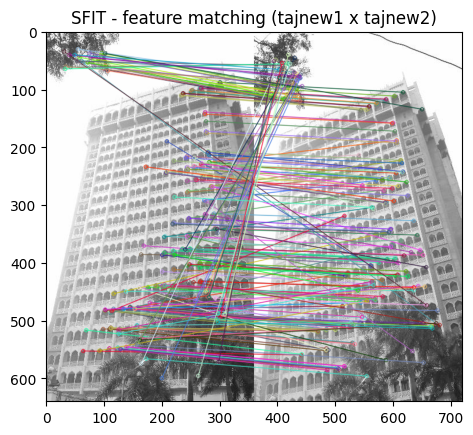

In [6]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(tajnew1,None)
kp2, des2 = orb.detectAndCompute(tajnew2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
match_img = cv2.drawMatches(tajnew1,kp1,tajnew2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.title('SFIT - feature matching (tajnew1 x tajnew2)')
plt.imshow(match_img)

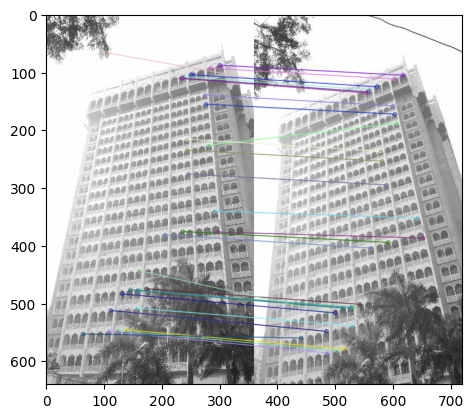

In [7]:
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

# Limit the number of matches to 15 (ou qualquer número desejado).
num_matches_to_keep = 30
matches = matches[:num_matches_to_keep]

# Draw the top 10 matches.
img3 = cv2.drawMatches(tajnew1, kp1, tajnew2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the image with the matches.
plt.imshow(img3)
plt.show()

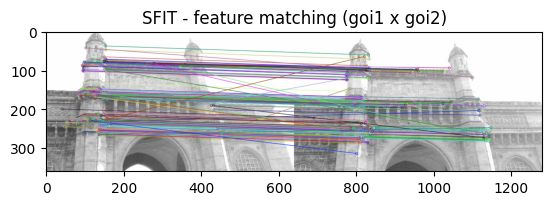

In [8]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(goi1,None)
kp2, des2 = orb.detectAndCompute(goi2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
match_img = cv2.drawMatches(goi1,kp1,goi2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.title('SFIT - feature matching (goi1 x goi2)')
plt.imshow(match_img)

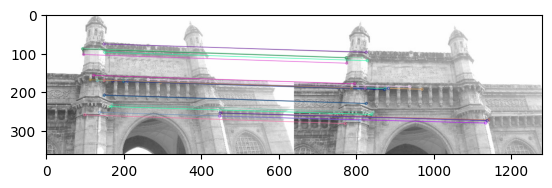

In [9]:
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

# Limit the number of matches to 15 (ou qualquer número desejado).
num_matches_to_keep = 30
matches = matches[:num_matches_to_keep]

# Draw the top 10 matches.
img3 = cv2.drawMatches(goi1, kp1, goi2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the image with the matches.
plt.imshow(img3)
plt.show()

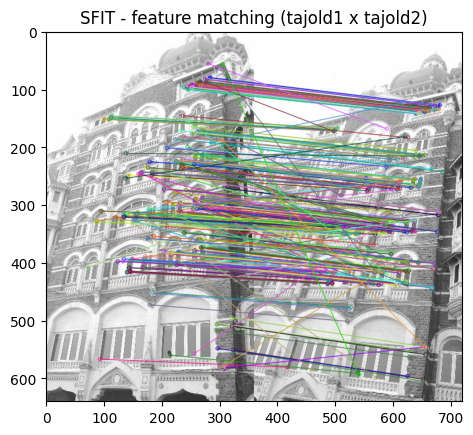

In [10]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(tajold1,None)
kp2, des2 = orb.detectAndCompute(tajold2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
match_img = cv2.drawMatches(tajold1,kp1,tajold2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.title('SFIT - feature matching (tajold1 x tajold2)')
plt.imshow(match_img)

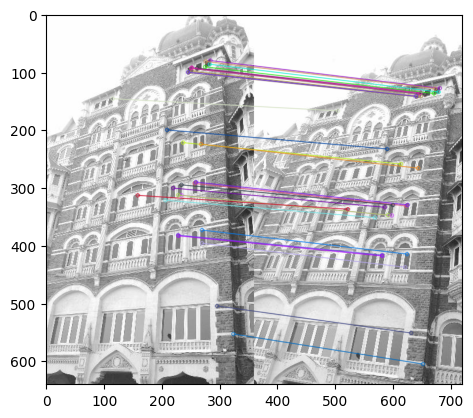

In [11]:
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

# Limit the number of matches to 15 (ou qualquer número desejado).
num_matches_to_keep = 30
matches = matches[:num_matches_to_keep]

# Draw the top 10 matches.
img3 = cv2.drawMatches(tajold1, kp1, tajold2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the image with the matches.
plt.imshow(img3)
plt.show()

Para limitar o número de correspondências (falsos negativos) em uma correspondência de recursos usando o algoritmo ORB com o OpenCV, você pode usar um critério baseado na distância entre os descritores correspondentes. A ideia é que correspondências com distâncias menores são mais confiáveis do que aquelas com distâncias maiores. Portanto, você pode definir um limite máximo de distância e considerar apenas as correspondências que têm uma distância menor do que esse limite.